<h1> Statistical Model and Plot </h1>

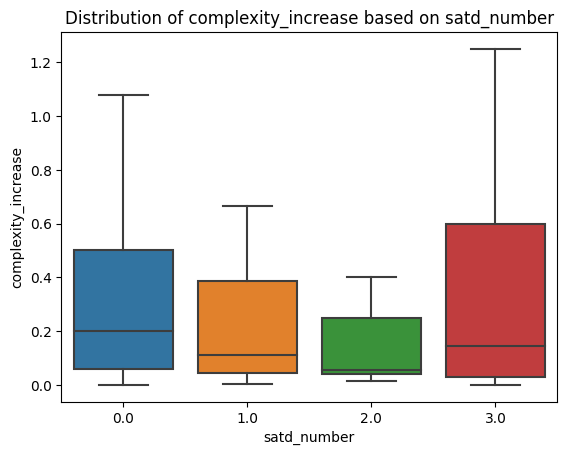

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
satd = pd.read_csv('satd.csv')
complex = pd.read_csv('final.csv')

complex_increase = complex['satd_increase_complexity_change']
complex_decrease = complex['satd_decrease_complexity_change']

new = pd.DataFrame({
    'complexity_increase': complex_increase,
    'complexity_decrease': complex_decrease,
    'satd_number': satd['satd_number'],
})
# draw a Boxplot to show the distribution of complexity_increase based on satd_number
plt.title('Distribution of complexity_increase based on satd_number')
sns.boxplot(x='satd_number', y='complexity_increase', data=new, showfliers=False)
plt.show()

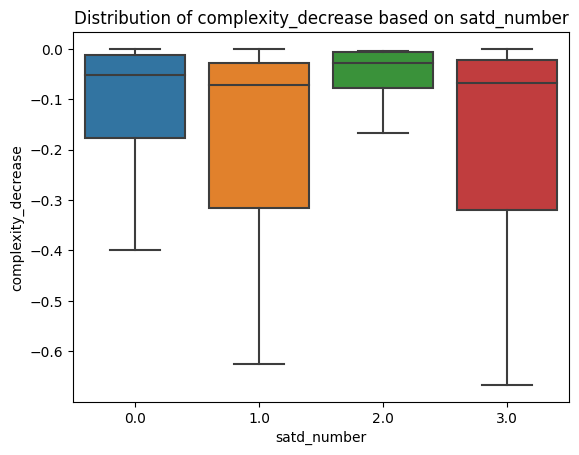

In [4]:
# draw a Boxplot to show the distribution of complexity_decrease based on satd_number
plt.title('Distribution of complexity_decrease based on satd_number')
sns.boxplot(x='satd_number', y='complexity_decrease', data=new, showfliers=False)
plt.show()

<h3> Dependency between the complexity_increase and complexity_decrease with satd_number</h3>


Group 1 standard deviation: 0.9039560434533143
Group 2 standard deviation: 2.3752786306099627
Group 1 size: 384
Group 2 size: 351
t-statistic:  8.471767425143755
p-value:  1.3182459312904023e-16


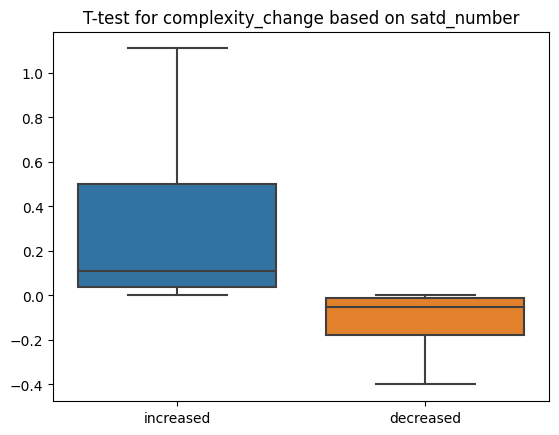

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create a new DataFrame with the relevant columns
new = pd.DataFrame({
    'complexity_increase': complex_increase,
    'complexity_decrease': complex_decrease,
    'satd_number': satd['satd_number'],
})
new.dropna(inplace=True)

# Split the data into two groups based on the value of satd_number
group1 = new[new['satd_number'] > 0]['complexity_increase']
group2 = new[new['satd_number'] <= 0]['complexity_decrease']


# Check if one of the groups has zero standard deviation
print("Group 1 standard deviation:", group1.std())
print("Group 2 standard deviation:", group2.std())

# Check if one of the groups has no data points
print("Group 1 size:", group1.size)
print("Group 2 size:", group2.size)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

# Draw the plot for the t-test
plt.title('T-test for complexity_change based on satd_number')
sns.boxplot(data=[group1, group2], showfliers=False)
plt.xticks([0, 1], ['increased', 'decreased'])
plt.show()



<h3>Analysis for relationship between code complexity and the presence of SATD in code comments</h3>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Check How many SATD in code comments are present in increased code complexity
satd_increase = new[new['complexity_increase'] > 0]['satd_number']
print("SATD in code comments are present in increased code complexity:", satd_increase.size)

# Check How many SATD in code comments are present in decreased code complexity
satd_decrease = new[new['complexity_decrease'] < 0]['satd_number']
print("SATD in code comments are present in decreased code complexity:", satd_decrease.size)

# Check How many SATD in code comments are present in unchanged code complexity
satd_unchanged = new[new['complexity_increase'] == 0]['satd_number']
print("SATD in code comments are present in unchanged code complexity:", satd_unchanged.size)








SATD in code comments are present in increased code complexity: 733
SATD in code comments are present in decreased code complexity: 735
SATD in code comments are present in unchanged code complexity: 2


Correlation coefficient:  0.009173556105487223
P-value:  0.8039137968839345


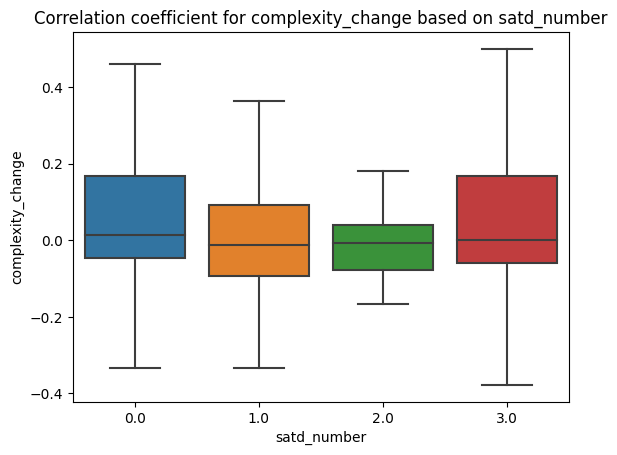

In [29]:
import pandas as pd
import scipy.stats as stats

# load the data into a pandas DataFrame
data = pd.read_csv('final.csv')
satd = pd.read_csv('satd.csv')

# Calculate complexity change = complexity_increase - complexity_decrease
complexity_change = data['Complexity_done'] - data['Complexity_before']
satd_num = satd['satd_number']

# Create a new DataFrame with the relevant columns
new = pd.DataFrame({
    'complexity_change': complexity_change,
    'satd_number': satd_num,
})
new.dropna(inplace=True)

# Calculate the correlation coefficient and the p-value
corr_coef, p_value = stats.pearsonr(new['complexity_change'], new['satd_number'])

# print the results
print("Correlation coefficient: ", corr_coef)
print("P-value: ", p_value)

# Draw the boxplot for the correlation coefficient
plt.title('Correlation coefficient for complexity_change based on satd_number')
sns.boxplot(x='satd_number', y='complexity_change', data=new, showfliers=False)
plt.show()
